# load task scores

In [1]:
import pandas as pd

In [2]:
dfb = pd.read_csv('/Users/qasem/PycharmProjects/grad_ecc_RL_data/RL_behavior.csv')  # df behaviour

In [3]:
dfb.head()

,Subject,Block,Trial,Score,ReactionTime,MovementTime,Valid
0,AB1,1,1,53.0,0.365009,0.182444,True
1,AB1,1,2,51.0,0.548555,0.402011,True
2,AB1,1,3,7.0,0.472627,0.269147,True
3,AB1,1,4,0.0,0.557651,0.289636,True
4,AB1,1,5,34.0,0.588884,0.211777,True


## create metrics
### calculate t-test as metric

In [4]:
import pingouin as pg

In [5]:
def ttest_init_final(df_subj):
    df_subj = df_subj[df_subj.Trial.notna()]
    # iloc[:n] takes first n rows, not till index n
    x, y = df_subj.iloc[:20]['Score'], df_subj.iloc[-20:]['Score']
    return pg.ttest(x, y, paired=True, alternative='less').iloc[0,0]

### fPCA score

In [6]:
fpca_scores = pd.read_csv('data/RLfpcaScores.csv').set_index('Subject')
metrics = dfb[dfb.Block==2].groupby('Subject').apply(ttest_init_final)
metrics = metrics.rename('tscore').to_frame().join(fpca_scores, how='inner')

In [7]:
metrics

,tscore,RLScore
Subject,,
AB1,-7.195868,-1.179789
AG1,-5.822339,1.104018
AH1,-2.248812,-0.302101
AM1,-6.593196,-1.400917
AP1,-15.539946,0.868475
AV1,-4.009663,0.859943
BN1,-6.426085,1.433999
CD1,-11.893333,-0.661215
CG1,-3.318209,-0.337563


In [8]:
import seaborn as sns

correlation between metrics

<AxesSubplot: xlabel='tscore', ylabel='RLScore'>

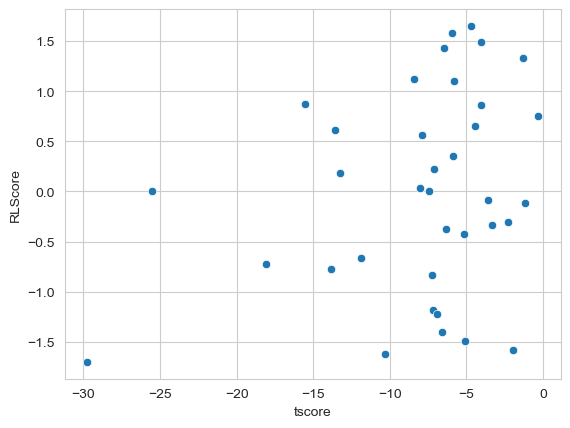

In [9]:
sns.scatterplot(data=metrics, x='tscore', y='RLScore')

## load features
gradients

In [10]:
dfg = pd.read_csv('data/gradients.csv')  # df gradient values
dfg

,subject,epoch,region,7net,17net,g1,g2,g3,g4,ecc
0,1,baseline,7Networks_LH_Vis_1,Vis,DorsAttnA,0.516958,-0.186538,1.501042,-0.668984,1.732833
1,1,baseline,7Networks_LH_Vis_2,Vis,VisCent,0.636391,1.407541,0.977047,-0.758676,1.978984
2,1,baseline,7Networks_LH_Vis_3,Vis,DorsAttnA,0.396966,0.630318,1.806822,0.007569,1.954366
3,1,baseline,7Networks_LH_Vis_4,Vis,VisCent,2.380421,2.049884,0.085447,-0.858037,3.257601
4,1,baseline,7Networks_LH_Vis_5,Vis,DefaultC,0.408135,0.698659,0.977117,0.278002,1.298746
...,...,...,...,...,...,...,...,...,...,...
109291,46,late,Right Putamen,Striatum,StriatumRight,-0.861413,-0.664291,-0.450307,-1.694324,2.063208
109292,46,late,Right Pallidum,Striatum,StriatumRight,-0.530126,-0.774942,-0.468807,-1.149747,1.556685
109293,46,late,Right Hippocampus,Striatum,StriatumRight,-0.938860,-0.247830,-1.223909,-1.464685,2.141526
109294,46,late,Right Amygdala,Striatum,StriatumRight,-1.114832,-0.355354,-1.374354,-1.242685,2.191402


In [11]:
match = pd.read_csv('/Users/qasem/PycharmProjects/gradients-rl-task/data/participants.tsv', delimiter='\t')
dff = pd.merge(dfg, match[match.exclude==0], left_on='subject', right_on='participant_id', how='inner') # df features
dff = dff.rename(columns={'dicom_dir': 'Subject'})
dff = dff.set_index(['subject', 'Subject', 'epoch', 'region', '7net', '17net'])[['ecc']].unstack('epoch')   # make epochs differentiable
dff = dff.droplevel(level=0, axis=1)

In [12]:
dff['b2e'] = dff['early'] - dff['baseline']
dff['e2l'] = dff['late'] - dff['early']
dff = dff.reorder_levels([2, 3, 4, 0, 1])
dff.head()

,,,,epoch,baseline,early,late,b2e,e2l
region,7net,17net,subject,Subject,,,,,
7Networks_LH_Cont_Cing_1,Cont,SalVentAttnB,1,AB1,1.579930,2.510811,3.351414,0.930881,0.840603
7Networks_LH_Cont_Cing_2,Cont,ContC,1,AB1,2.881808,3.327869,1.732942,0.446061,-1.594927
7Networks_LH_Cont_Cing_3,Cont,ContC,1,AB1,2.869047,3.241946,2.264225,0.372899,-0.977721
7Networks_LH_Cont_Cing_4,Cont,ContA,1,AB1,0.842360,2.098228,2.278887,1.255868,0.180659
7Networks_LH_Cont_Cing_5,Cont,ContC,1,AB1,1.641586,2.067705,2.066989,0.426119,-0.000716


In [13]:
df = dff.reset_index(level=[0,1,2,3]).join(metrics)  # metrics and features merged
df = df.set_index(['region', '7net', '17net', 'subject', df.index])

In [14]:
df.head()

,,,,,baseline,early,late,b2e,e2l,tscore,RLScore
region,7net,17net,subject,Subject,,,,,,,
7Networks_LH_Cont_Cing_1,Cont,SalVentAttnB,1,AB1,1.579930,2.510811,3.351414,0.930881,0.840603,-7.195868,-1.179789
7Networks_LH_Cont_Cing_2,Cont,ContC,1,AB1,2.881808,3.327869,1.732942,0.446061,-1.594927,-7.195868,-1.179789
7Networks_LH_Cont_Cing_3,Cont,ContC,1,AB1,2.869047,3.241946,2.264225,0.372899,-0.977721,-7.195868,-1.179789
7Networks_LH_Cont_Cing_4,Cont,ContA,1,AB1,0.842360,2.098228,2.278887,1.255868,0.180659,-7.195868,-1.179789
7Networks_LH_Cont_Cing_5,Cont,ContC,1,AB1,1.641586,2.067705,2.066989,0.426119,-0.000716,-7.195868,-1.179789


# cross correlation

In [15]:
from scipy.stats import pearsonr

In [16]:
def r_value(data, x, y):   return pearsonr(data[x], data[y])[0]
def p_value(data, x, y):   return pearsonr(data[x], data[y])[1]

<AxesSubplot: xlabel='b2e', ylabel='tscore'>

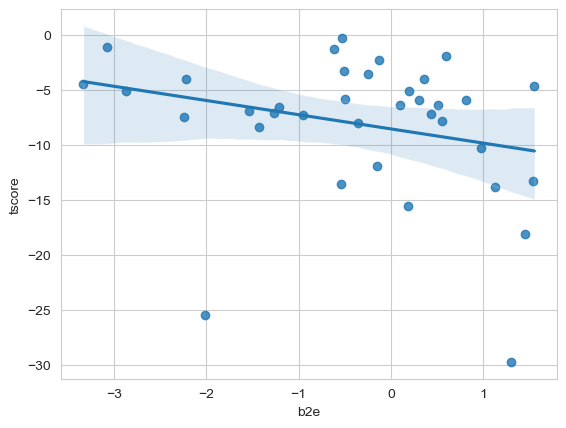

In [17]:
sns.regplot(data=df.loc['7Networks_LH_Default_PFC_9'], x='b2e', y='tscore')

## on each region

In [18]:
df.head()

,,,,,baseline,early,late,b2e,e2l,tscore,RLScore
region,7net,17net,subject,Subject,,,,,,,
7Networks_LH_Cont_Cing_1,Cont,SalVentAttnB,1,AB1,1.579930,2.510811,3.351414,0.930881,0.840603,-7.195868,-1.179789
7Networks_LH_Cont_Cing_2,Cont,ContC,1,AB1,2.881808,3.327869,1.732942,0.446061,-1.594927,-7.195868,-1.179789
7Networks_LH_Cont_Cing_3,Cont,ContC,1,AB1,2.869047,3.241946,2.264225,0.372899,-0.977721,-7.195868,-1.179789
7Networks_LH_Cont_Cing_4,Cont,ContA,1,AB1,0.842360,2.098228,2.278887,1.255868,0.180659,-7.195868,-1.179789
7Networks_LH_Cont_Cing_5,Cont,ContC,1,AB1,1.641586,2.067705,2.066989,0.426119,-0.000716,-7.195868,-1.179789


In [19]:
dfcr = []    # cross correlation
X = ['baseline', 'early', 'late', 'b2e', 'e2l']
Y = ['RLScore']
for y in Y:
    for x in X:
        r = df.groupby(level=0).apply(r_value, x=x, y=y)    # grouped by region
        p = df.groupby(level=0).apply(p_value, x=x, y=y)
        _, pcorr = pg.multicomp(p, method='fdr_bh')
        pcorr = pd.Series(pcorr, index=p.index)
        dfcr.append(pd.concat([r, p, pcorr], axis=1, keys=['r', 'p', 'pcor']))
dfcr = pd.concat(dfcr, axis=1, keys=[x+'__'+y for x in X for y in Y])

In [20]:
dfcr.head()

baseline__RLScore                     early__RLScore  \
                                         r         p      pcor              r   
region                                                                          
7Networks_LH_Cont_Cing_1          0.166323  0.332298  0.989760       0.122089   
7Networks_LH_Cont_Cing_2         -0.094146  0.584959  0.989760      -0.355747   
7Networks_LH_Cont_Cing_3          0.030368  0.860437  0.991502      -0.251122   
7Networks_LH_Cont_Cing_4          0.169644  0.322596  0.989760       0.144244   
7Networks_LH_Cont_Cing_5          0.422829  0.010193  0.989760      -0.307655   

                                             late__RLScore            \
                                 p      pcor             r         p   
region                                                                 
7Networks_LH_Cont_Cing_1  0.478111  0.949064     -0.156780  0.361165   
7Networks_LH_Cont_Cing_2  0.033224  0.764154      0.311559  0.064353   
7Networks_LH_Cont_Cing_3  0.139583  0.888416      0.275570  0.103793   
7Networks_LH_Cont_Cing_4  0.401287  0.949064      0.030282  0.860827   
7Networks_LH_Cont_Cing_5  0.067949  0.845800      0.163002  0.342180   

                                   b2e__RLScore                      \
                              pcor            r         p      pcor   
region                                                                
7Networks_LH_Cont_Cing_1  0.996365    -0.004711  0.978244  0.988007   
7Networks_LH_Cont_Cing_2  0.996365    -0.169190  0.323912  0.934343   
7Networks_LH_Cont_Cing_3  0.996365    -0.188462  0.270999  0.934343   
7Networks_LH_Cont_Cing_4  0.996365    -0.028071  0.870900  0.985405   
7Networks_LH_Cont_Cing_5  0.996365    -0.446280  0.006367  0.916937   

                         e2l__RLScore                      
                                    r         p      pcor  
region                                                     
7Networks_LH_Cont_Cing_1    -0.190305  0.266254  0.971820  
7Networks_LH_Cont_Cing_2     0.414118  0.012043  0.814193  
7Networks_LH_Cont_Cing_3     0.314861  0.061431  0.900982  
7Networks_LH_Cont_Cing_4    -0.064132  0.710193  0.978356  
7Networks_LH_Cont_Cing_5     0.288431  0.088011  0.916884

significant regions out of 1012 regions

In [21]:
p = dfcr.xs('p', axis=1, level=1)
(p<.05).sum()

baseline__RLScore    33
early__RLScore       61
late__RLScore        34
b2e__RLScore         51
e2l__RLScore         54
dtype: int64

In [22]:
import nibabel
from brainspace.datasets import load_conte69
from brainspace.utils.parcellation import map_to_labels
from surfplot import Plot
fname = '/Users/qasem/PycharmProjects/gradients-rl-task/data/Schaefer2018_1000Parcels_7Networks_order.dlabel.nii'
l_hemi, r_hemi = load_conte69()
vertices = nibabel.load(fname).get_fdata()[0]

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [23]:
region_names = pd.read_csv('data/regions_sorted.csv')['region']

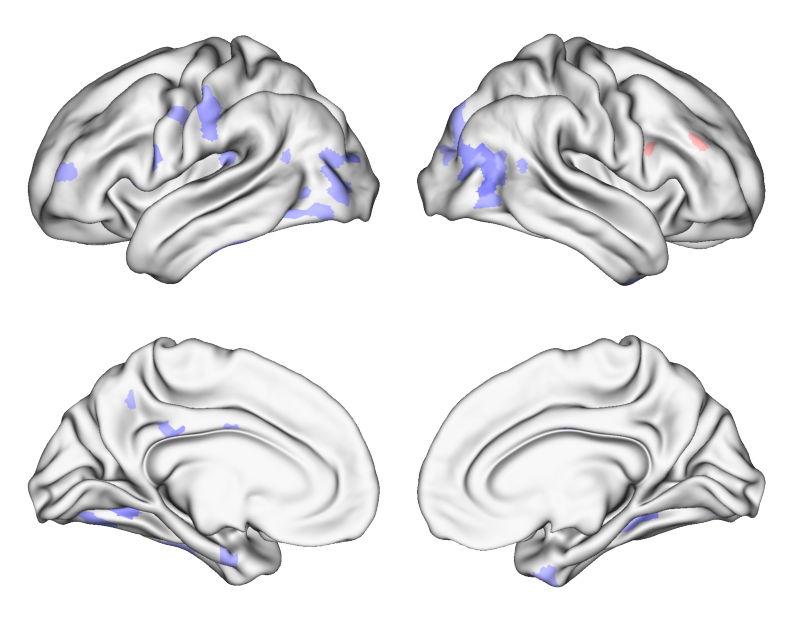

In [24]:
data = dfcr['early__RLScore']
data = data.apply(lambda row: row['r'] if row['p']<.05 else None, axis=1)
data = data.loc[region_names]
data = map_to_labels(data, vertices, mask=(vertices != 0))
p = Plot(surf_lh=l_hemi, surf_rh=r_hemi, layout='grid', size=(900, 700))
p.add_layer(data, cbar=False, cmap='bwr', color_range=(-1,1))
_ = p.build()

## 7 network
average features within networks

In [25]:
df.head()

,,,,,baseline,early,late,b2e,e2l,tscore,RLScore
region,7net,17net,subject,Subject,,,,,,,
7Networks_LH_Cont_Cing_1,Cont,SalVentAttnB,1,AB1,1.579930,2.510811,3.351414,0.930881,0.840603,-7.195868,-1.179789
7Networks_LH_Cont_Cing_2,Cont,ContC,1,AB1,2.881808,3.327869,1.732942,0.446061,-1.594927,-7.195868,-1.179789
7Networks_LH_Cont_Cing_3,Cont,ContC,1,AB1,2.869047,3.241946,2.264225,0.372899,-0.977721,-7.195868,-1.179789
7Networks_LH_Cont_Cing_4,Cont,ContA,1,AB1,0.842360,2.098228,2.278887,1.255868,0.180659,-7.195868,-1.179789
7Networks_LH_Cont_Cing_5,Cont,ContC,1,AB1,1.641586,2.067705,2.066989,0.426119,-0.000716,-7.195868,-1.179789


In [26]:
# level 1 is for 7 network - level 2 is for 17 network
dfn7 = df.groupby(level=[1,3,4]).mean()  # df networks mean
dfn7.head()

baseline     early      late       b2e       e2l  \
7net subject Subject                                                     
Cont 1       AB1      2.693424  2.542259  3.139027 -0.151165  0.596768   
     2       AG1      2.768695  2.797363  2.977104  0.028667  0.179741   
     3       AH1      2.733566  2.748539  2.646460  0.014973 -0.102079   
     4       AM1      2.495153  2.723009  3.000811  0.227856  0.277802   
     6       AP1      2.688645  3.074856  2.737626  0.386211 -0.337231   

                         tscore   RLScore  
7net subject Subject                       
Cont 1       AB1      -7.195868 -1.179789  
     2       AG1      -5.822339  1.104018  
     3       AH1      -2.248812 -0.302101  
     4       AM1      -6.593196 -1.400917  
     6       AP1     -15.539946  0.868475

In [27]:
# dfn7.xs('JS1', level=2)
# dfn7.dropna(inplace=True)

In [28]:
dfn7.loc['Limbic']

,,baseline,early,late,b2e,e2l,tscore,RLScore
subject,Subject,,,,,,,
1,AB1,1.753462,2.622839,2.591867,0.869377,-0.030973,-7.195868,-1.179789
2,AG1,1.974920,1.847991,2.242053,-0.126929,0.394062,-5.822339,1.104018
3,AH1,2.049521,2.064206,1.766884,0.014684,-0.297322,-2.248812,-0.302101
4,AM1,2.168872,2.295605,1.933349,0.126733,-0.362256,-6.593196,-1.400917
6,AP1,2.684421,2.228505,2.131638,-0.455917,-0.096867,-15.539946,0.868475
7,AV1,2.185039,1.728208,2.191345,-0.456831,0.463138,-4.009663,0.859943
8,BN1,2.496586,2.185391,2.361804,-0.311196,0.176413,-6.426085,1.433999
9,CD1,1.803491,1.786990,2.422435,-0.016501,0.635445,-11.893333,-0.661215
10,CG1,2.359467,2.057391,2.270541,-0.302076,0.213150,-3.318209,-0.337563


<AxesSubplot: xlabel='b2e', ylabel='RLScore'>

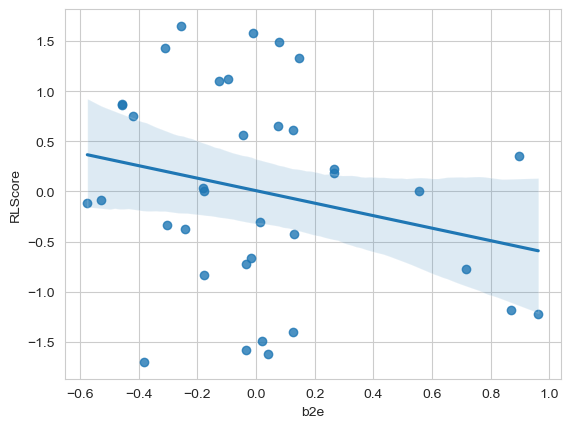

In [29]:
sns.regplot(data=dfn7.loc['Limbic'], x='b2e', y='RLScore')

In [30]:
dfc7 = []    # cross correlation
X = ['baseline', 'early', 'late', 'b2e', 'e2l']
Y = ['RLScore']
for y in Y:
    for x in X:
        r = dfn7.groupby(level=0).apply(r_value, x=x, y=y)    # grouped by network
        p = dfn7.groupby(level=0).apply(p_value, x=x, y=y)
        _, pcorr = pg.multicomp(p, method='fdr_bh')
        pcorr = pd.Series(pcorr, index=p.index)
        dfc7.append(pd.concat([r, p, pcorr], axis=1, keys=['r', 'p', 'pcor']))
dfc7 = pd.concat(dfc7, axis=1, keys=[x+'__'+y for x in X for y in Y])

In [31]:
dfc7

baseline__RLScore                     early__RLScore            \
                            r         p      pcor              r         p   
7net                                                                         
Cont                 0.027112  0.875275  0.977552       0.037280  0.829095   
Default             -0.046152  0.789254  0.977552      -0.151587  0.377485   
DorsAttn             0.295405  0.080265  0.537996      -0.152432  0.374802   
Limbic               0.074318  0.666638  0.977552      -0.221485  0.194217   
SalVentAttn          0.254286  0.134499  0.537996      -0.196671  0.250288   
SomMot              -0.004861  0.977552  0.977552      -0.127849  0.457434   
Striatum            -0.014671  0.932320  0.977552      -0.135512  0.430684   
Vis                  0.136755  0.426428  0.977552      -0.289218  0.087109   

                      late__RLScore                     b2e__RLScore  \
                 pcor             r         p      pcor            r   
7net                                                                   
Cont         0.829095     -0.056316  0.744248  0.820147     0.003651   
Default      0.522782      0.039264  0.820147  0.820147    -0.091733   
DorsAttn     0.522782     -0.050453  0.770120  0.820147    -0.308878   
Limbic       0.522782      0.088776  0.606641  0.820147    -0.242433   
SalVentAttn  0.522782     -0.134383  0.434568  0.820147    -0.278413   
SomMot       0.522782     -0.163158  0.341711  0.820147    -0.075985   
Striatum     0.522782     -0.252251  0.137752  0.820147    -0.074945   
Vis          0.522782      0.216031  0.205711  0.820147    -0.252723   

                                e2l__RLScore                      
                    p      pcor            r         p      pcor  
7net                                                              
Cont         0.983142  0.983142    -0.056459  0.743622  0.838883  
Default      0.594660  0.758844     0.127848  0.457438  0.838883  
DorsAttn     0.066807  0.308535     0.066561  0.699720  0.838883  
Limbic       0.154267  0.308535     0.210609  0.217596  0.838883  
SalVentAttn  0.100132  0.308535     0.035116  0.838883  0.838883  
SomMot       0.659607  0.758844    -0.039839  0.817558  0.838883  
Striatum     0.663989  0.758844    -0.089409  0.604067  0.838883  
Vis          0.136993  0.308535     0.324172  0.053751  0.430011

In [32]:
p = dfc7.xs('p', axis=1, level=1)
(p<.05).sum()

baseline__RLScore    0
early__RLScore       0
late__RLScore        0
b2e__RLScore         0
e2l__RLScore         0
dtype: int64

<AxesSubplot: ylabel='7net'>

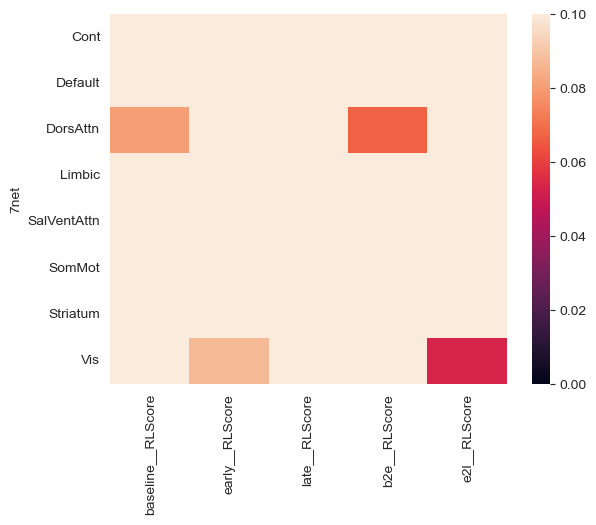

In [33]:
sns.heatmap(dfc7.xs('p', axis=1, level=1), vmin=0, vmax=.1)

## 17 network

In [34]:
# level 1 is for 7 network - level 2 is for 17 network
dfn17 = df.groupby(level=[2,3,4]).mean()  # df networks mean
dfn17.head()

baseline     early      late       b2e       e2l  \
17net subject Subject                                                     
ContA 1       AB1      2.295317  2.586899  2.927281  0.291582  0.340382   
      2       AG1      2.734415  2.881234  2.921745  0.146819  0.040510   
      3       AH1      3.163622  2.661075  2.481281 -0.502547 -0.179794   
      4       AM1      2.500188  2.655211  2.849887  0.155024  0.194676   
      6       AP1      2.802678  3.022130  2.813918  0.219452 -0.208212   

                          tscore   RLScore  
17net subject Subject                       
ContA 1       AB1      -7.195868 -1.179789  
      2       AG1      -5.822339  1.104018  
      3       AH1      -2.248812 -0.302101  
      4       AM1      -6.593196 -1.400917  
      6       AP1     -15.539946  0.868475

In [35]:
dfn17.loc['DorsAttnA']

,,baseline,early,late,b2e,e2l,tscore,RLScore
subject,Subject,,,,,,,
1,AB1,2.506013,3.561924,3.433465,1.055910,-0.128458,-7.195868,-1.179789
2,AG1,3.486623,3.077975,3.070569,-0.408648,-0.007406,-5.822339,1.104018
3,AH1,3.320220,3.023186,2.848300,-0.297034,-0.174886,-2.248812,-0.302101
4,AM1,3.236016,3.374225,2.757671,0.138208,-0.616554,-6.593196,-1.400917
6,AP1,3.099582,3.009507,2.893724,-0.090075,-0.115783,-15.539946,0.868475
7,AV1,3.004278,3.452615,2.564821,0.448337,-0.887794,-4.009663,0.859943
8,BN1,3.155521,2.823218,3.868180,-0.332303,1.044963,-6.426085,1.433999
9,CD1,2.689726,3.182209,3.240891,0.492482,0.058682,-11.893333,-0.661215
10,CG1,3.072255,3.263234,3.342977,0.190979,0.079743,-3.318209,-0.337563


<AxesSubplot: xlabel='b2e', ylabel='RLScore'>

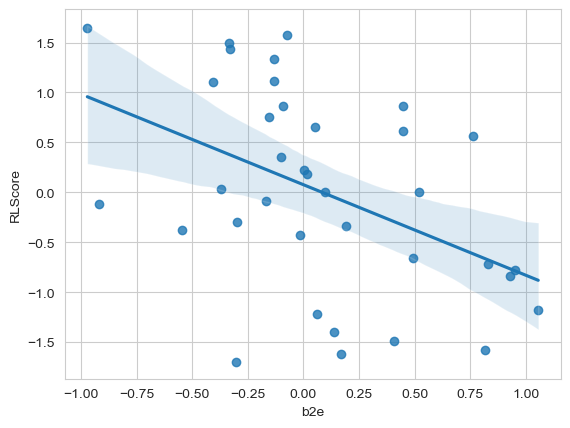

In [36]:
sns.regplot(data=dfn17.loc['DorsAttnA'], x='b2e', y='RLScore')

In [37]:
dfc17 = []    # cross correlation
X = ['baseline', 'early', 'late', 'b2e', 'e2l']
Y = ['RLScore']
for y in Y:
    for x in X:
        r = dfn17.groupby(level=0).apply(r_value, x=x, y=y)    # grouped by network
        p = dfn17.groupby(level=0).apply(p_value, x=x, y=y)
        _, pcorr = pg.multicomp(p, method='fdr_bh')
        pcorr = pd.Series(pcorr, index=p.index)
        dfc17.append(pd.concat([r, p, pcorr], axis=1, keys=['r', 'p', 'pcor']))
dfc17 = pd.concat(dfc17, axis=1, keys=[x+'__'+y for x in X for y in Y])

In [38]:
dfc17

baseline__RLScore                     early__RLScore            \
                              r         p      pcor              r         p   
17net                                                                          
ContA                  0.242422  0.154288  0.829181       0.137614  0.423502   
ContB                 -0.109831  0.523693  0.829181       0.053711  0.755711   
ContC                 -0.193306  0.258646  0.829181      -0.233268  0.170941   
DefaultA              -0.071501  0.678584  0.920936      -0.161892  0.345519   
DefaultB               0.059165  0.731777  0.926918      -0.080667  0.640011   
DefaultC              -0.011683  0.946084  0.986628      -0.229685  0.177796   
DorsAttnA              0.252912  0.136689  0.829181      -0.456676  0.005114   
DorsAttnB              0.121241  0.481198  0.829181      -0.055471  0.747963   
LimbicA                0.032224  0.851999  0.986570      -0.193746  0.257542   
LimbicB                0.096684  0.574833  0.840141      -0.140201  0.414754   
SalVentAttnA           0.262242  0.122321  0.829181      -0.161318  0.347255   
SalVentAttnB           0.211218  0.216239  0.829181      -0.032315  0.851587   
SomMotA               -0.183033  0.285296  0.829181      -0.032317  0.851574   
SomMotB                0.158345  0.356331  0.829181      -0.188087  0.271971   
StriatumLeft          -0.002895  0.986628  0.986628      -0.148715  0.386694   
StriatumRight         -0.025482  0.882721  0.986570      -0.115169  0.503587   
TempPar                0.116208  0.499719  0.829181      -0.107052  0.534316   
VisCent                0.161951  0.345341  0.829181      -0.300751  0.074693   
VisPeri                0.114379  0.506536  0.829181      -0.168158  0.326915   

                        late__RLScore                     b2e__RLScore  \
                   pcor             r         p      pcor            r   
17net                                                                    
ContA          0.670544     -0.196148  0.251575  0.646616    -0.084964   
ContB          0.844618      0.002455  0.988662  0.988662     0.111271   
ContC          0.670544      0.188244  0.271564  0.646616     0.018215   
DefaultA       0.670544      0.013985  0.935482  0.988662    -0.063962   
DefaultB       0.810681     -0.007330  0.966155  0.988662    -0.091162   
DefaultC       0.670544      0.110062  0.522813  0.903041    -0.124971   
DorsAttnA      0.097173      0.083951  0.626408  0.988662    -0.450562   
DorsAttnB      0.844618     -0.046809  0.786319  0.988662    -0.119707   
LimbicA        0.670544      0.198323  0.246250  0.646616    -0.167592   
LimbicB        0.670544     -0.056176  0.744864  0.988662    -0.213777   
SalVentAttnA   0.670544     -0.175369  0.306292  0.646616    -0.262747   
SalVentAttnB   0.851587     -0.111709  0.516576  0.903041    -0.184596   
SomMotA        0.851587     -0.217270  0.203060  0.646616     0.095483   
SomMotB        0.670544     -0.038584  0.823211  0.988662    -0.210589   
StriatumLeft   0.670544     -0.183815  0.283206  0.646616    -0.093722   
StriatumRight  0.725143     -0.306276  0.069257  0.646616    -0.054654   
TempPar        0.725143      0.018966  0.912576  0.988662    -0.154012   
VisCent        0.670544      0.186025  0.277358  0.646616    -0.263635   
VisPeri        0.670544      0.206005  0.228054  0.646616    -0.178135   

                                  e2l__RLScore                      
                      p      pcor            r         p      pcor  
17net                                                               
ContA          0.622234  0.738902    -0.194992  0.254436  0.690611  
ContB          0.518230  0.738902    -0.033458  0.846397  0.945973  
ContC          0.916028  0.916028     0.256848  0.130483  0.616901  
DefaultA       0.710928  0.793310     0.111524  0.517274  0.945973  
DefaultB       0.596962  0.738902     0.055603  0.747383  0.945973  
DefaultC       0.467705  0.738902     0.207199  0.225309  0.690611  
Dor

In [39]:
p = dfc17.xs('p', axis=1, level=1)
(p<.05).sum()

baseline__RLScore    0
early__RLScore       1
late__RLScore        0
b2e__RLScore         1
e2l__RLScore         1
dtype: int64

<AxesSubplot: ylabel='17net'>

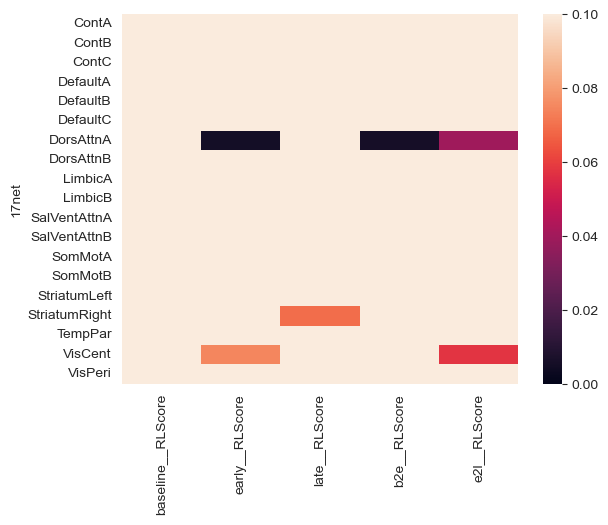

In [40]:
sns.heatmap(dfc17.xs('p', axis=1, level=1), vmin=0, vmax=.1)

# permutation test

In [41]:
from pingouin import distance_corr

In [42]:
def perm_pvalue(df, feature, metric):   return distance_corr(df[feature], df[metric])[1]

## regoins

In [43]:
df.head()

,,,,,baseline,early,late,b2e,e2l,tscore,RLScore
region,7net,17net,subject,Subject,,,,,,,
7Networks_LH_Cont_Cing_1,Cont,SalVentAttnB,1,AB1,1.579930,2.510811,3.351414,0.930881,0.840603,-7.195868,-1.179789
7Networks_LH_Cont_Cing_2,Cont,ContC,1,AB1,2.881808,3.327869,1.732942,0.446061,-1.594927,-7.195868,-1.179789
7Networks_LH_Cont_Cing_3,Cont,ContC,1,AB1,2.869047,3.241946,2.264225,0.372899,-0.977721,-7.195868,-1.179789
7Networks_LH_Cont_Cing_4,Cont,ContA,1,AB1,0.842360,2.098228,2.278887,1.255868,0.180659,-7.195868,-1.179789
7Networks_LH_Cont_Cing_5,Cont,ContC,1,AB1,1.641586,2.067705,2.066989,0.426119,-0.000716,-7.195868,-1.179789


In [44]:
df.loc['7Networks_LH_Cont_Cing_1']

baseline     early      late       b2e  \
7net 17net        subject Subject                                           
Cont SalVentAttnB 1       AB1      1.579930  2.510811  3.351414  0.930881   
                  2       AG1      3.517658  3.823488  2.389208  0.305830   
                  3       AH1      2.335139  1.983248  1.571522 -0.351890   
                  4       AM1      1.927699  2.389032  2.718790  0.461333   
                  6       AP1      1.844896  2.818948  0.990385  0.974052   
                  7       AV1      3.536721  1.781280  1.582131 -1.755441   
                  8       BN1      1.685159  1.928411  2.518372  0.243252   
                  9       CD1      2.541401  1.605992  2.408289 -0.935409   
                  10      CG1      2.163047  2.149965  3.746296 -0.013082   
                  11      CH1      1.920260  2.552032  3.042574  0.631771   
                  12      CK1      1.660527  2.284115  4.494268  0.623588   
                  13      CM1      2.084163  1.595539  1.799677 -0.488624   
                  14      CM2      2.787100  2.914182  2.982514  0.127082   
                  15      CS1      2.535155  1.833316  3.181236 -0.701839   
                  16      EH1      1.813324  4.646819  2.806612  2.833496   
                  17      EK1      2.345408  2.941076  3.190370  0.595667   
                  18      HK1      2.660456  2.234464  3.030312 -0.425993   
                  19      HS1      2.316271  2.818323  2.346968  0.502053   
                  20      JC1      2.287415  1.833660  3.830116 -0.453756   
                  21      JH1      2.379764  3.137212  3.495661  0.757448   
                  23      JM1      2.969953  1.433003  1.684791 -1.536950   
                  24      JR1      2.556985  2.086329  1.500293 -0.470656   
                  26      KK1      2.248285  3.395986  0.675521  1.147700   
                  28      KP1      1.181847  3.983517  2.878301  2.801671   
                  29      KR1      2.927040  2.623971  2.806905 -0.303068   
                  30      LB1      2.764953  2.052787  3.031407 -0.712166   
                  31      MB1      0.910315  4.251804  2.656542  3.341489   
                  32      MG1      1.903308  2.077636  2.300513  0.174329   
                  33      MP1      2.257331  1.197777  3.522655 -1.059554   
                  35      NW1      2.042179  1.965599  1.478230 -0.076581   
                  38      SK1      2.589592  1.151595  3.515735 -1.437997   
                  40      SM2      2.036498  3.180592  0.716461  1.144094   
                  41      SR1      3.260708  1.704357  2.868869 -1.556351   
                  44      UP1      3.093398  2.032582  1.658464 -1.060816   
                  45      WK1      4.005707  3.082868  2.473592 -0.922838   
                  46      ZN1      2.303472  2.509474  3.201352  0.206002   

                                        e2l     tscore   RLScore  
7net 17net        subject Subject                                 
Cont SalVentAttnB 1       AB1      0.840603  -7.195868 -1.179789  
                  2       AG1     -1.434280  -5.822339  1.104018  
                  3       AH1     -0.411727  -2.248812 -0.302101  
                  4       AM1      0.329758  -6.593196 -1.400917  
                  6       AP1     -1.828563 -15.539946  0.868475  
                  7       AV1     -0.199149  -4.009663  0.859943  
                  8       BN1      0.589961  -6.426085  1.433999  
                  9       CD1      0.802297 -11.893333 -0.661215  
                  10      CG1      1.596331  -3.318209 -0.337563  
                  11      CH1      0.490543  -3.573430 -0.088406  
                  12      CK1      2.210153 -18.086867 -0.719677  
                  13      CM1      0.204138  -7.138170  0.220940  
                  14      CM2      0.068332  -4.033090  1.491491  
                  15      CS1      1.347920 -29.750010 -1.698549  
                  16      EH1     -1

In [45]:
perm_pvalue(df.loc['7Networks_LH_Cont_Cing_1'], 'baseline', 'RLScore')

0.291

In [49]:
df.groupby(level=0).apply(perm_pvalue, feature='baseline', metric='tscore')

region
7Networks_LH_Cont_Cing_1    0.655
7Networks_LH_Cont_Cing_2    0.678
7Networks_LH_Cont_Cing_3    0.789
7Networks_LH_Cont_Cing_4    0.221
7Networks_LH_Cont_Cing_5    0.930
                            ...  
Right Caudate               0.899
Right Hippocampus           0.380
Right Pallidum              0.459
Right Putamen               0.594
Right Thalamus              0.114
Length: 1012, dtype: float64

region
7Networks_LH_Cont_Cing_1    0.670
7Networks_LH_Cont_Cing_2    0.688
7Networks_LH_Cont_Cing_3    0.788
7Networks_LH_Cont_Cing_4    0.231
7Networks_LH_Cont_Cing_5    0.939
                            ...  
Right Caudate               0.885
Right Hippocampus           0.398
Right Pallidum              0.474
Right Putamen               0.565
Right Thalamus              0.104
Length: 1012, dtype: float64

In [50]:
dfperm = []
X = ['baseline', 'early', 'late', 'b2e', 'e2l']
Y = ['RLScore']
for y in Y:
    for x in X:
        p = df.groupby(level=0).apply(perm_pvalue, feature=x, metric=y)
        _, pcorr = pg.multicomp(p, method='fdr_bh')
        pcorr = pd.Series(pcorr, index=p.index)
        dfperm.append(pd.concat([p, pcorr], axis=1, keys=['p', 'pcor']))

In [51]:
dfperm = pd.concat(dfperm, axis=1, keys=[x+'__'+y for x in X for y in Y])

In [52]:
# dfperm.to_csv('data/permutation_regions.csv')

In [53]:
(dfperm.xs('p', level=1, axis=1) < .05).sum()

baseline__RLScore    36
early__RLScore       64
late__RLScore        34
b2e__RLScore         50
e2l__RLScore         58
dtype: int64

In [54]:
dfperm.head()

baseline__RLScore          early__RLScore            \
                                         p     pcor              p      pcor   
region                                                                         
7Networks_LH_Cont_Cing_1             0.311  0.99697          0.284  0.934895   
7Networks_LH_Cont_Cing_2             0.453  0.99697          0.104  0.841225   
7Networks_LH_Cont_Cing_3             0.714  0.99697          0.325  0.940164   
7Networks_LH_Cont_Cing_4             0.314  0.99697          0.476  0.940164   
7Networks_LH_Cont_Cing_5             0.011  0.99697          0.192  0.904425   

                         late__RLScore           b2e__RLScore            \
                                     p      pcor            p      pcor   
region                                                                    
7Networks_LH_Cont_Cing_1         0.193  0.995644        0.768  0.981032   
7Networks_LH_Cont_Cing_2         0.157  0.995644        0.221  0.981032   
7Networks_LH_Cont_Cing_3         0.090  0.995644        0.264  0.981032   
7Networks_LH_Cont_Cing_4         0.907  0.995644        0.512  0.981032   
7Networks_LH_Cont_Cing_5         0.094  0.995644        0.025  0.902595   

                         e2l__RLScore            
                                    p      pcor  
region                                           
7Networks_LH_Cont_Cing_1        0.071  0.840151  
7Networks_LH_Cont_Cing_2        0.030  0.798947  
7Networks_LH_Cont_Cing_3        0.088  0.840151  
7Networks_LH_Cont_Cing_4        0.595  0.999964  
7Networks_LH_Cont_Cing_5        0.051  0.830746

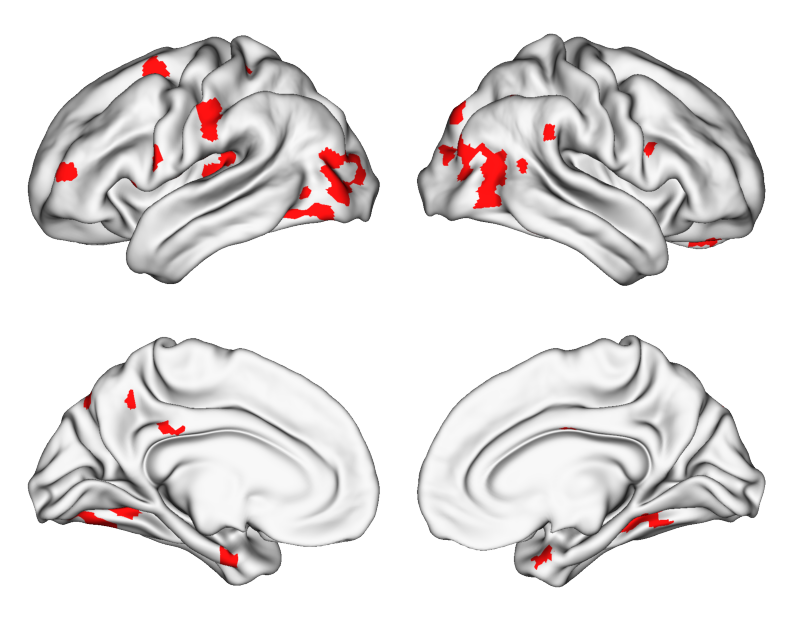

In [55]:
data = dfperm['early__RLScore']
data = data.loc[region_names]
data = data['p'] < .05
data = data.loc[region_names]
data = map_to_labels(data, vertices, mask=(vertices != 0))
p = Plot(surf_lh=l_hemi, surf_rh=r_hemi, layout='grid', size=(900, 700))
p.add_layer(data, cbar=False, cmap='bwr', color_range=(-1,1))
_ = p.build()

## 17 network

In [56]:
# level 1 is for 7 network - level 2 is for 17 network
dfn17 = df.groupby(level=[2, 3, 4]).mean()  # df networks mean

In [57]:
dfn17.loc['DorsAttnA']

,,baseline,early,late,b2e,e2l,tscore,RLScore
subject,Subject,,,,,,,
1,AB1,2.506013,3.561924,3.433465,1.055910,-0.128458,-7.195868,-1.179789
2,AG1,3.486623,3.077975,3.070569,-0.408648,-0.007406,-5.822339,1.104018
3,AH1,3.320220,3.023186,2.848300,-0.297034,-0.174886,-2.248812,-0.302101
4,AM1,3.236016,3.374225,2.757671,0.138208,-0.616554,-6.593196,-1.400917
6,AP1,3.099582,3.009507,2.893724,-0.090075,-0.115783,-15.539946,0.868475
7,AV1,3.004278,3.452615,2.564821,0.448337,-0.887794,-4.009663,0.859943
8,BN1,3.155521,2.823218,3.868180,-0.332303,1.044963,-6.426085,1.433999
9,CD1,2.689726,3.182209,3.240891,0.492482,0.058682,-11.893333,-0.661215
10,CG1,3.072255,3.263234,3.342977,0.190979,0.079743,-3.318209,-0.337563


In [58]:
# on 7 networks 'Cont' level 1
perm_pvalue(dfn17.loc['DorsAttnA'], feature='baseline', metric='tscore')

0.091

In [59]:
dfperm17 = []
X = ['baseline', 'early', 'late', 'b2e', 'e2l']
Y = ['RLScore']
for y in Y:
    for x in X:
        p = dfn17.groupby(level=0).apply(perm_pvalue, feature=x, metric=y)
        _, pcorr = pg.multicomp(p, method='fdr_bh')
        pcorr = pd.Series(pcorr, index=p.index)
        dfperm17.append(pd.concat([p, pcorr], axis=1, keys=['p', 'pcor']))
dfperm17 = pd.concat(dfperm17, axis=1, keys=[x+'__'+y for x in X for y in Y])

In [60]:
dfperm17

baseline__RLScore           early__RLScore            \
                              p      pcor              p      pcor   
17net                                                                
ContA                     0.022  0.418000          0.873  0.937333   
ContB                     0.682  0.913000          0.567  0.798000   
ContC                     0.635  0.913000          0.164  0.779000   
DefaultA                  0.889  0.913000          0.389  0.798000   
DefaultB                  0.598  0.913000          0.976  0.976000   
DefaultC                  0.897  0.913000          0.369  0.798000   
DorsAttnA                 0.121  0.766333          0.013  0.247000   
DorsAttnB                 0.591  0.913000          0.425  0.798000   
LimbicA                   0.913  0.913000          0.361  0.798000   
LimbicB                   0.724  0.913000          0.304  0.798000   
SalVentAttnA              0.050  0.475000          0.580  0.798000   
SalVentAttnB              0.392  0.913000          0.888  0.937333   
SomMotA                   0.403  0.913000          0.670  0.798000   
SomMotB                   0.424  0.913000          0.058  0.367333   
StriatumLeft              0.656  0.913000          0.527  0.798000   
StriatumRight             0.533  0.913000          0.620  0.798000   
TempPar                   0.224  0.913000          0.672  0.798000   
VisCent                   0.436  0.913000          0.051  0.367333   
VisPeri                   0.810  0.913000          0.224  0.798000   

              late__RLScore           b2e__RLScore           e2l__RLScore  \
                          p      pcor            p      pcor            p   
17net                                                                       
ContA                 0.126  0.798000        0.531  0.776765        0.176   
ContB                 0.770  0.951118        0.661  0.776765        0.210   
ContC                 0.398  0.822700        0.918  0.918000        0.149   
DefaultA              0.960  0.960000        0.478  0.776765        0.904   
DefaultB              0.286  0.822700        0.676  0.776765        0.731   
DefaultC              0.851  0.951118        0.659  0.776765        0.463   
DorsAttnA             0.353  0.822700        0.008  0.152000        0.175   
DorsAttnB             0.815  0.951118        0.826  0.871889        0.644   
LimbicA               0.215  0.822700        0.459  0.776765        0.039   
LimbicB               0.388  0.822700        0.405  0.776765        0.302   
SalVentAttnA          0.433  0.822700        0.062  0.589000        0.620   
SalVentAttnB          0.599  0.948417        0.259  0.776765        0.640   
SomMotA               0.313  0.822700        0.606  0.776765        0.866   
SomMotB               0.737  0.951118        0.166  0.776765        0.806   
StriatumLeft          0.732  0.951118        0.665  0.776765        0.756   
StriatumRight         0.122  0.798000        0.578  0.776765        0.854   
TempPar               0.924  0.960000        0.571  0.776765        0.599   
VisCent               0.544  0.939636        0.149  0.776765        0.012   
VisPeri               0.118  0.798000        0.695  0.776765        0.090   

                         
                   pcor  
17net                    
ContA          0.557333  
ContB          0.570000  
ContC          0.557333  
DefaultA       0.904000  
DefaultB       0.904000  
DefaultC       0.904000  
DorsAttnA      0.557333  
DorsAttnB      0.904000  
LimbicA        0.370500  
LimbicB        0.717250  
SalVentAttnA   0.904000  
SalVentAttnB   0.904000  
SomMotA        0.904000  
SomMotB        0.904000  
StriatumLeft   0.904000  
StriatumRight  0.904000  
TempPar        0.904000  
VisCent        0.228000  
VisPeri        0.557333

In [61]:
# dfperm17.to_csv('data/permutation_17nets.csv')

In [62]:
(dfperm17.xs('p', level=1, axis=1)<.05).sum()

baseline__RLScore    1
early__RLScore       1
late__RLScore        0
b2e__RLScore         1
e2l__RLScore         2
dtype: int64

<AxesSubplot: ylabel='17net'>

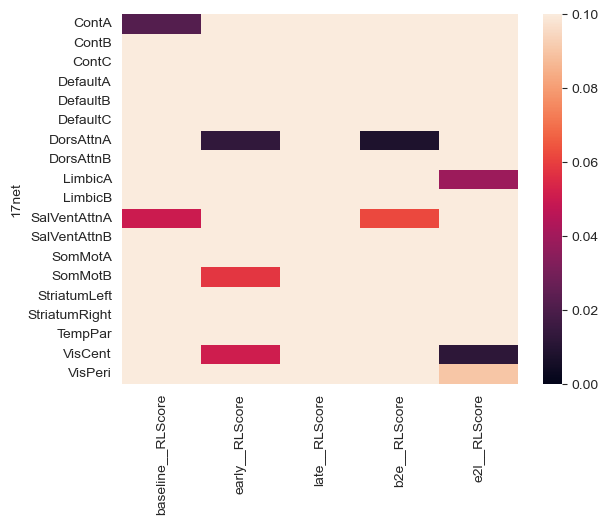

In [63]:
sns.heatmap(dfperm17.xs('p', axis=1, level=1), vmin=0, vmax=.1)

<AxesSubplot: ylabel='17net'>

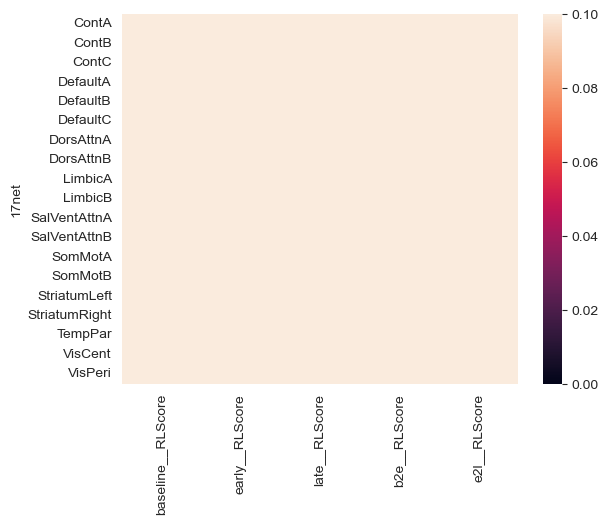

In [64]:
sns.heatmap(dfperm17.xs('pcor', axis=1, level=1), vmin=0, vmax=.1)

## 7 networks

In [65]:
# level 1 is for 7 network - level 2 is for 17 network
dfn7 = df.groupby(level=[1, 3, 4]).mean()   # df networks mean

In [67]:
dfperm7 = []
X = ['baseline', 'early', 'late', 'b2e', 'e2l']
Y = ['RLScore']
for y in Y:
    for x in X:
        p = dfn7.groupby(level=0).apply(perm_pvalue, feature=x, metric=y)
        _, pcorr = pg.multicomp(p, method='fdr_bh')
        pcorr = pd.Series(pcorr, index=p.index)
        dfperm7.append(pd.concat([p, pcorr], axis=1, keys=['p', 'pcor']))
dfperm7 = pd.concat(dfperm7, axis=1, keys=[x+'__'+y for x in X for y in Y])

In [68]:
dfperm7

baseline__RLScore        early__RLScore           late__RLScore  \
                            p   pcor              p      pcor             p   
7net                                                                          
Cont                    0.914  0.914          0.836  0.836000         0.444   
Default                 0.829  0.914          0.530  0.633143         0.961   
DorsAttn                0.038  0.260          0.332  0.633143         0.935   
Limbic                  0.572  0.914          0.187  0.633143         0.241   
SalVentAttn             0.065  0.260          0.518  0.633143         0.558   
SomMot                  0.623  0.914          0.443  0.633143         0.897   
Striatum                0.518  0.914          0.554  0.633143         0.336   
Vis                     0.740  0.914          0.038  0.304000         0.321   

                    b2e__RLScore           e2l__RLScore            
               pcor            p      pcor            p      pcor  
7net                                                               
Cont         0.8880        0.991  0.991000        0.361  0.962667  
Default      0.9610        0.202  0.473600        0.823  0.974000  
DorsAttn     0.9610        0.085  0.340000        0.861  0.974000  
Limbic       0.8880        0.249  0.473600        0.109  0.436000  
SalVentAttn  0.8928        0.070  0.340000        0.974  0.974000  
SomMot       0.9610        0.479  0.638667        0.782  0.974000  
Striatum     0.8880        0.748  0.854857        0.640  0.974000  
Vis          0.8880        0.296  0.473600        0.035  0.280000

In [69]:
(dfperm7.xs('p', level=1, axis=1)<.05).sum()

baseline__RLScore    1
early__RLScore       1
late__RLScore        0
b2e__RLScore         0
e2l__RLScore         1
dtype: int64

<AxesSubplot: ylabel='7net'>

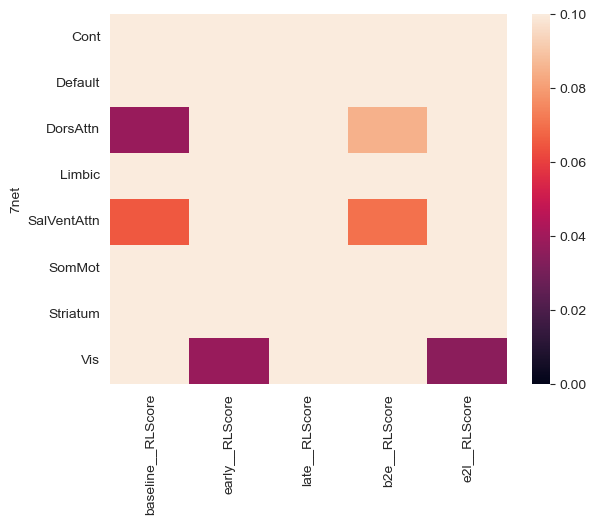

In [73]:
sns.heatmap(dfperm7.xs('p', axis=1, level=1), vmin=0, vmax=.1)